2. Machhine L:earning for Regression project

In [129]:
import pandas as pd
import numpy as np

2.2 Data preparation

In [130]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

Download data

In [131]:
# !wget $data

In [132]:
df = pd.read_csv('data.csv')

In [133]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [134]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

Change column names by replacing spaces with underscores

In [135]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [136]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [137]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [138]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_') 

In [139]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


2.3 Exploratory data analysis

In [140]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [141]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

distribution of price

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<Axes: xlabel='msrp', ylabel='Count'>

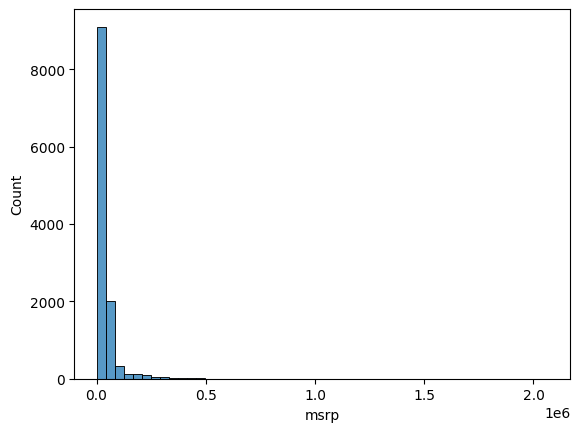

In [143]:
sns.histplot(df.msrp, bins=50)

The x-axis exhibits a long-tail distribution: some price points correspond to a single car, while others contain many. We should focus on the range between 0 and 0.5 (1e6)

<Axes: xlabel='msrp', ylabel='Count'>

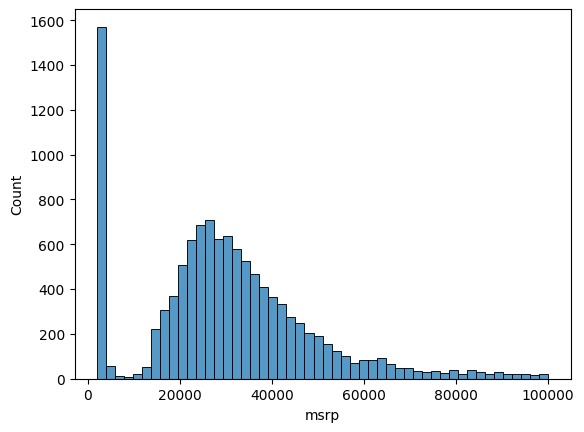

In [144]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

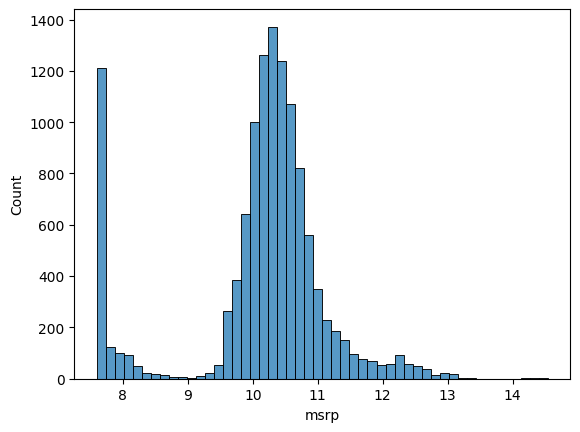

In [145]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

Missing values

In [146]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

2.4 Setting up the validation framework

In [147]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


In [148]:
n, n_val + n_test + n_train

(11914, 11914)

In [149]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]


Randomize the indexes to get a different values to work with.

In [150]:
idx = np.arange(n)

In [151]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [152]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [153]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [154]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [155]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [156]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [157]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [158]:
len(y_train)

7150

2.5 Linear regression

In [159]:
df_train.iloc[10]


make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [160]:
xi = [17, 17, 58.6]
w0 = 0 # bias term
w = [1, 1, 1] # weights

In [161]:
def linear_regression_longer(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred 

In [162]:
linear_regression_longer(xi)

92.6

In [163]:
np.expm1(77)

np.float64(2.7585134545231703e+33)

2.6 Linear regression

In [164]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [165]:
w_new = [w0] + w
w_new

[0, 1, 1, 1]

In [166]:
def linear_regression(xi):   
    xi = [1] + xi  # add bias term
    return dot(xi, w_new)


In [167]:
linear_regression(xi)

92.6

In [168]:
w0 = 7.17 # bias term
w = [0.01, 0.04, 0.002] # weights
w_new = [w0] + w

In [169]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

x = [x1, x2, x10]
X = np.array(x)

In [170]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

2.7 Training a linear regression model

In [171]:
x = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86]
]
X = np.array(x)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86],
       [ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86]])

In [172]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [173]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])  # add bias term

In [174]:
XTX = X.T.dot(X)
XTX 

array([[9.0000000e+00, 2.0990000e+03, 2.3000000e+02, 7.7060000e+03],
       [2.0990000e+03, 7.1589100e+05, 4.3315000e+04, 1.1312500e+06],
       [2.3000000e+02, 4.3315000e+04, 7.1460000e+03, 1.9335300e+05],
       [7.7060000e+03, 1.1312500e+06, 1.9335300e+05, 1.2328546e+07]])

In [175]:
XTX_inv = np.linalg.inv(XTX) # inverse of XTX
XTX_inv

array([[ 6.08695381e+00, -9.58348013e-03, -1.01924583e-01,
        -1.32678503e-03],
       [-9.58348013e-03,  1.72955033e-05,  1.46752712e-04,
         2.10160085e-06],
       [-1.01924583e-01,  1.46752712e-04,  2.03509673e-03,
         1.83253378e-05],
       [-1.32678503e-03,  2.10160085e-06,  1.83253378e-05,
         4.30181343e-07]])

In [176]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00, -3.25175948e-18,  8.15455559e-17,
        -1.59168079e-18],
       [ 1.81134057e-12,  1.00000000e+00, -1.73659237e-14,
        -7.07332333e-16],
       [-7.06355547e-14, -2.73741990e-16,  1.00000000e+00,
        -1.33427277e-17],
       [-1.00019147e-11,  1.20729613e-14,  1.23558133e-13,
         1.00000000e+00]])

In [177]:
w_full = XTX_inv.dot(X.T).dot(y)

In [178]:
w0 = w_full[0]
w = w_full[1:]


$w$ = $(X^TX)^{-1}X^Ty$

In [179]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # apply the formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX) # inverse of XTX
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]  # return bias and weights
    

2.8 Car price baseline model

In [180]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [181]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # feature names that we will use

In [182]:
X_train = df_train[base].values

In [183]:
X_train = df_train[base].fillna(0).values # if we fiil this with 0, we can ignore missing values

In [184]:
w0, w = train_linear_regression(X_train, y_train)

In [185]:
y_pred = w0 + X_train.dot(w)
y_pred


array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

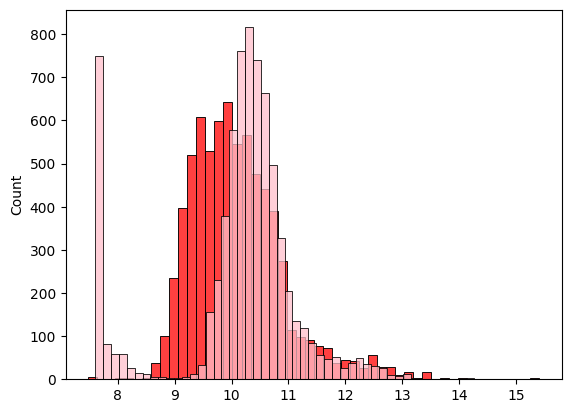

In [186]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color='pink', bins=50)

Model predict smaller values than it should

2.9 RMSE

$$RMSE = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} {(g(x_i) - y_i)^2}}$$

In [187]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [188]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

2.10 Walidating the model

In [189]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # feature names that we will use

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)


In [190]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [191]:
# training set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616530991301627)

2.11 Simple feature engineering

In [192]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year # new feature based created from year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [193]:
X_train = prepare_X(df_train)

In [194]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [195]:
# training set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058327)

<Axes: ylabel='Count'>

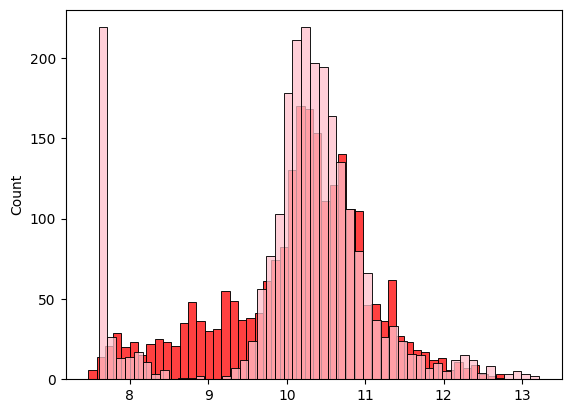

In [196]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_val, color='pink', bins=50)

2.12 Categorical variables

In [197]:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')


In [198]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()


    df['age'] = 2017 - df.year # new feature based created from year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [199]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [200]:
# training set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5157995641501902)

0.5172055461058327

In [201]:
makes = list(df.make.value_counts().head().index)
      # see how many unique values are there

In [202]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    # add car year as a feature
    df['age'] = 2017 - df.year # new feature based created from year
    features.append('age')

    # add number of doors as a feature
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    # add car make as a feature
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [203]:
# training set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5076038849556633)

In [204]:
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type', 
              'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [205]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [206]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [207]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    # add car year as a feature
    df['age'] = 2017 - df.year # new feature based created from year
    features.append('age')

    # add number of doors as a feature
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c in categorical_variables:
        for v in categories[c]:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))


    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [208]:
# training set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(20.255338567164987)

2.13 Regilarization

In [209]:
XTX = X.T.dot(X)
XTX

array([[9.0000000e+00, 2.0990000e+03, 2.3000000e+02, 7.7060000e+03],
       [2.0990000e+03, 7.1589100e+05, 4.3315000e+04, 1.1312500e+06],
       [2.3000000e+02, 4.3315000e+04, 7.1460000e+03, 1.9335300e+05],
       [7.7060000e+03, 1.1312500e+06, 1.9335300e+05, 1.2328546e+07]])

In [210]:
XTX_inv = np.linalg.inv(XTX)

In [211]:
XTX_inv.dot(X.T).dot(y)

array([-1.07057119e+02,  3.39097904e-01,  5.74522814e+00,  5.84408377e-02])